# ***Assignment 1:***   
## Exploring US flight data 




###  Data  understanding
##### Description: 
Reporting carriers are required to (or voluntarily) report on-time data for flights they operate: on-time arrival and departure data for non-stop domestic flights by month and year, by carrier and by origin and destination airport. Includes scheduled and actual departure and arrival times, canceled and diverted flights, taxi-out and taxi-in times, causes of delay and cancellation, air time, and non-stop distance.

https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time

* Variables: 
   * `FL_DATE`: Flight date (yyyymmdd)
   * `TAIL_NUM`:Tail number 
   * `CARRIER`: Unique carrier code (AA -->"american airlines")
   * `ORIGIN`:  Origin airport name 
   * `ORIGIN_CITY_NAME`: Extended name of city,country origin airport
   * `DEST`: Destination airport name 
   * `DEST_CITY_NAME`: Extended name of city,country destination airport
   * `DEP_TIME`: Actual Departure Time (local time: hhmm)
   * `DEP_DELAY`: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
   * `ARR_TIME`:Actual Arrival Time (local time: hhmm)
   * `ARR_DELAY`: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
   * `CANCELLED`: Cancelled Flight Indicator (1=Yes)
   * `CANCELLATION_CODE`: Specifies The Reason For Cancellation
   * `DIVERTED`: Diverted Flight Indicator (1=Yes)
   * `CARRIER_DELAY`: Carrier Delay, in Minutes
   * `WEATHER_DELAY`: Weather Delay, in Minutes
   * `NAS_DELAY`: National Air System Delay, in Minutes
   * `SECURITY_DELAY`: Security Delay, in Minutes
   * `LATE_AIRCRAFT_DELAY`:Late Aircraft Delay, in Minutes
   
   
   


##### Libraries

In [67]:
import pandas as pd
import numpy as np 
from IPython.display import display,HTML  # to print multiple output in a single cell 
from matplotlib import pyplot as plt
import seaborn as sns



##### First look at dataset

In [68]:
data_filename = "119734260_T_ONTIME_REPORTING.csv"
data = pd.read_csv(data_filename, parse_dates = ["FL_DATE"]) # convert FL_Date from object to datetime64

data.columns = data.columns.str.title() # Each column Xxx_Yyy

print("The data shape is",data.shape)
display("Showing data types of variable",data.dtypes)  # there are some object which are heavy in memory 
display(data.head(3)) # there are some NaN 
display(data.tail(3))

The data shape is (5674621, 20)
The data shape is (5674621, 20)


'Showing data types of variable'

'Showing data types of variable'

Fl_Date                datetime64[ns]
Tail_Num                       object
Carrier                        object
Origin                         object
Origin_City_Name               object
Dest                           object
Dest_City_Name                 object
Dep_Time                      float64
Dep_Delay                     float64
Arr_Time                      float64
Arr_Delay                     float64
Cancelled                     float64
Cancellation_Code              object
Diverted                      float64
Carrier_Delay                 float64
Weather_Delay                 float64
Nas_Delay                     float64
Security_Delay                float64
Late_Aircraft_Delay           float64
Unnamed: 19                   float64
dtype: object

Fl_Date                datetime64[ns]
Tail_Num                       object
Carrier                        object
Origin                         object
Origin_City_Name               object
Dest                           object
Dest_City_Name                 object
Dep_Time                      float64
Dep_Delay                     float64
Arr_Time                      float64
Arr_Delay                     float64
Cancelled                     float64
Cancellation_Code              object
Diverted                      float64
Carrier_Delay                 float64
Weather_Delay                 float64
Nas_Delay                     float64
Security_Delay                float64
Late_Aircraft_Delay           float64
Unnamed: 19                   float64
dtype: object

,Fl_Date,Tail_Num,Carrier,Origin,Origin_City_Name,Dest,Dest_City_Name,Dep_Time,Dep_Delay,Arr_Time,Arr_Delay,Cancelled,Cancellation_Code,Diverted,Carrier_Delay,Weather_Delay,Nas_Delay,Security_Delay,Late_Aircraft_Delay,Unnamed: 19
0,2017-01-01,N3CGAA,AA,DEN,"Denver, CO",PHX,"Phoenix, AZ",1135.0,-10.0,1328.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,N3CGAA,AA,PHX,"Phoenix, AZ",PDX,"Portland, OR",1502.0,-8.0,1653.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,N3EVAA,AA,DCA,"Washington, DC",MIA,"Miami, FL",646.0,-13.0,930.0,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


,Fl_Date,Tail_Num,Carrier,Origin,Origin_City_Name,Dest,Dest_City_Name,Dep_Time,Dep_Delay,Arr_Time,Arr_Delay,Cancelled,Cancellation_Code,Diverted,Carrier_Delay,Weather_Delay,Nas_Delay,Security_Delay,Late_Aircraft_Delay,Unnamed: 19
0,2017-01-01,N3CGAA,AA,DEN,"Denver, CO",PHX,"Phoenix, AZ",1135.0,-10.0,1328.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,N3CGAA,AA,PHX,"Phoenix, AZ",PDX,"Portland, OR",1502.0,-8.0,1653.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,N3EVAA,AA,DCA,"Washington, DC",MIA,"Miami, FL",646.0,-13.0,930.0,-14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


,Fl_Date,Tail_Num,Carrier,Origin,Origin_City_Name,Dest,Dest_City_Name,Dep_Time,Dep_Delay,Arr_Time,Arr_Delay,Cancelled,Cancellation_Code,Diverted,Carrier_Delay,Weather_Delay,Nas_Delay,Security_Delay,Late_Aircraft_Delay,Unnamed: 19
5674618,2017-12-31,N956WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",1451.0,1.0,1459.0,-6.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,N222WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",1038.0,13.0,1049.0,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5674620,2017-12-31,N488WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",800.0,-5.0,812.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


,Fl_Date,Tail_Num,Carrier,Origin,Origin_City_Name,Dest,Dest_City_Name,Dep_Time,Dep_Delay,Arr_Time,Arr_Delay,Cancelled,Cancellation_Code,Diverted,Carrier_Delay,Weather_Delay,Nas_Delay,Security_Delay,Late_Aircraft_Delay,Unnamed: 19
5674618,2017-12-31,N956WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",1451.0,1.0,1459.0,-6.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,N222WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",1038.0,13.0,1049.0,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5674620,2017-12-31,N488WN,WN,TUS,"Tucson, AZ",SAN,"San Diego, CA",800.0,-5.0,812.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Quick look at missing values

In [69]:
data.dropna(axis = 1, how = "all", inplace = True) # remove columns with all missing data

display(data.isnull().sum())                       # count missing data in each column                           
print("Obtaining a shape of",data.shape)           

Fl_Date                      0
Tail_Num                 12511
Carrier                      0
Origin                       0
Origin_City_Name             0
Dest                         0
Dest_City_Name               0
Dep_Time                 80308
Dep_Delay                80343
Arr_Time                 84674
Arr_Delay                95211
Cancelled                    0
Cancellation_Code      5591928
Diverted                     0
Carrier_Delay          4645148
Weather_Delay          4645148
Nas_Delay              4645148
Security_Delay         4645148
Late_Aircraft_Delay    4645148
dtype: int64

Obtaining a shape of (5674621, 19)


Fl_Date                      0
Tail_Num                 12511
Carrier                      0
Origin                       0
Origin_City_Name             0
Dest                         0
Dest_City_Name               0
Dep_Time                 80308
Dep_Delay                80343
Arr_Time                 84674
Arr_Delay                95211
Cancelled                    0
Cancellation_Code      5591928
Diverted                     0
Carrier_Delay          4645148
Weather_Delay          4645148
Nas_Delay              4645148
Security_Delay         4645148
Late_Aircraft_Delay    4645148
dtype: int64

Obtaining a shape of (5674621, 19)


#### Question 1

Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. ** Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights. **

After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.

Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience. 

In [70]:
# Select only necessary columns to improve visualization of dataset
data[["Fl_Date","Carrier","Origin","Dest","Dep_Delay"]].sample(5)

,Fl_Date,Carrier,Origin,Dest,Dep_Delay
1234749,2017-03-24,WN,BWI,TPA,-5.0
656668,2017-02-15,EV,MHT,ORD,0.0
2181908,2017-05-24,DL,LGA,ATL,17.0
3839981,2017-09-02,UA,ORD,PDX,-3.0
4129292,2017-09-21,UA,SFO,PIT,18.0


,Fl_Date,Carrier,Origin,Dest,Dep_Delay
1234749,2017-03-24,WN,BWI,TPA,-5.0
656668,2017-02-15,EV,MHT,ORD,0.0
2181908,2017-05-24,DL,LGA,ATL,17.0
3839981,2017-09-02,UA,ORD,PDX,-3.0
4129292,2017-09-21,UA,SFO,PIT,18.0


In [71]:
# Find outliers
outliers = data.Origin.value_counts()[data.Origin.value_counts() < 
                                  data.Origin.value_counts().quantile(0.01)].index.tolist()

flights = data.loc[~data.Origin.isin(outliers)].reset_index()
print("Airports in the lowest 1% percentile in # of flights",outliers)
print("Obtaining a shape of",flights.shape)

Airports in the lowest 1% percentile in # of flights ['GGG', 'BPT', 'SWO', 'TKI']
Obtaining a shape of (5674604, 20)
Airports in the lowest 1% percentile in # of flights ['GGG', 'BPT', 'SWO', 'TKI']
Obtaining a shape of (5674604, 20)


To calculate probabilities that a flight departing from an airport is delayed, i firstly count the #of delayed flight in each airport, then i divided by total #of flights in the same airport

In [72]:
# Get total flights for each airport 
n_flight = flights.groupby("Origin").size() 
n_flight.head(10)

Origin
ABE     2138
ABI       42
ABQ    19060
ABR      728
ABY      621
ACK      665
ACT      339
ACV     1202
ACY     3511
ADK      104
dtype: int64

Origin
ABE     2138
ABI       42
ABQ    19060
ABR      728
ABY      621
ACK      665
ACT      339
ACV     1202
ACY     3511
ADK      104
dtype: int64

In [73]:
# Get total flights with delays in each airport 
delay = flights[flights['Dep_Delay'] > 0].groupby('Origin')['Dep_Delay'].count() 
delay.head(10)

Origin
ABE     549
ABI      15
ABQ    6753
ABR     202
ABY     161
ACK     362
ACT      80
ACV     368
ACY     816
ADK      43
Name: Dep_Delay, dtype: int64

Origin
ABE     549
ABI      15
ABQ    6753
ABR     202
ABY     161
ACK     362
ACT      80
ACV     368
ACY     816
ADK      43
Name: Dep_Delay, dtype: int64

In [74]:
# Calculate probabilities, sorting in desc order
prob = (delay / n_flight).sort_values()
prob.head(10)

Origin
LWS    0.086321
BRO    0.109346
GJT    0.117420
HOB    0.121260
CPR    0.122981
HLN    0.125521
LCH    0.126427
GCK    0.128342
INL    0.131410
TXK    0.133333
dtype: float64

Origin
LWS    0.086321
BRO    0.109346
GJT    0.117420
HOB    0.121260
CPR    0.122981
HLN    0.125521
LCH    0.126427
GCK    0.128342
INL    0.131410
TXK    0.133333
dtype: float64

In [75]:
# Get the average delay for each airport, sorting in desc order 
Avg_Delay = flights.groupby("Origin").Dep_Delay.mean().sort_values() 
Avg_Delay.head(10)


Origin
YAK   -6.954738
BET   -5.388651
DLG   -5.285714
AKN   -4.809524
CDV   -4.761972
SCC   -4.043847
BRW   -3.923777
OME   -3.337192
CPR   -3.310087
PSG   -2.518258
Name: Dep_Delay, dtype: float64

Origin
YAK   -6.954738
BET   -5.388651
DLG   -5.285714
AKN   -4.809524
CDV   -4.761972
SCC   -4.043847
BRW   -3.923777
OME   -3.337192
CPR   -3.310087
PSG   -2.518258
Name: Dep_Delay, dtype: float64

In [76]:
# Get the median delay for each airport, sorting in desc order  
Avg_Median = flights.groupby("Origin").Dep_Delay.median().sort_values() 
Avg_Median.head(10)

Origin
YAK   -14.0
WRG   -12.0
CDV   -12.0
BET   -11.0
SCC   -11.0
PSG   -11.0
MKG   -10.0
BRW   -10.0
LWS   -10.0
LCH    -9.0
Name: Dep_Delay, dtype: float64

Origin
YAK   -14.0
WRG   -12.0
CDV   -12.0
BET   -11.0
SCC   -11.0
PSG   -11.0
MKG   -10.0
BRW   -10.0
LWS   -10.0
LCH    -9.0
Name: Dep_Delay, dtype: float64

In [77]:
# Create final dataframe
table = pd.DataFrame({'Prob': prob,
                      'Avg_Delay': Avg_Delay ,
                      'Avg_Median': Avg_Median}).sort_values(by = ["Prob"])
table



,Prob,Avg_Delay,Avg_Median
LWS,0.086321,-1.761651,-10.0
BRO,0.109346,0.975096,-9.0
GJT,0.117420,-0.289535,-7.0
HOB,0.121260,-0.916803,-9.0
CPR,0.122981,-3.310087,-9.0
HLN,0.125521,4.641408,-5.0
LCH,0.126427,4.720539,-9.0
GCK,0.128342,7.441989,-8.0
INL,0.131410,0.374392,-9.0
TXK,0.133333,4.805556,-7.0


,Prob,Avg_Delay,Avg_Median
LWS,0.086321,-1.761651,-10.0
BRO,0.109346,0.975096,-9.0
GJT,0.117420,-0.289535,-7.0
HOB,0.121260,-0.916803,-9.0
CPR,0.122981,-3.310087,-9.0
HLN,0.125521,4.641408,-5.0
LCH,0.126427,4.720539,-9.0
GCK,0.128342,7.441989,-8.0
INL,0.131410,0.374392,-9.0
TXK,0.133333,4.805556,-7.0


## Question 2 

Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.

Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.

And finally, as you would expect,  enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.

Note that because in the 2017 performance data airlines are only indicated by their code, you should also download the carrier lookup table from https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS, so that you can include airline names in your results.

* Load dataset "CarrierName" in order to include carrier extended names

In [78]:
carrier_name = "CarrierName.asp"
carrier_data = pd.read_csv(carrier_name)
carrier_data.head(10)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E..."
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E..."
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


 Here i work with original dataset --> data

In [79]:
# Take unique values of carriers and then filtering the new dataset by those values 
airline = data.Carrier.unique() 
carrier_data = carrier_data.loc[carrier_data["Code"].isin(airline),:].reset_index(drop=True)
display(carrier_data)


,Code,Description
0,AA,American Airlines Inc.
1,AS,Alaska Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines Inc.
5,F9,Frontier Airlines Inc.
6,HA,Hawaiian Airlines Inc.
7,NK,Spirit Air Lines
8,OO,SkyWest Airlines Inc.
9,UA,United Air Lines Inc.


,Code,Description
0,AA,American Airlines Inc.
1,AS,Alaska Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines Inc.
5,F9,Frontier Airlines Inc.
6,HA,Hawaiian Airlines Inc.
7,NK,Spirit Air Lines
8,OO,SkyWest Airlines Inc.
9,UA,United Air Lines Inc.


Here i am interested in calculating the probabilities that a flight operated by the airline has delay.

The approach is the same of question1

In [80]:
# Total flight for each carrier
n_carrier = data.groupby("Carrier").size()
n_carrier

Carrier
AA     896348
AS     185068
B6     298654
DL     923560
EV     339541
F9     103027
HA      80172
NK     156818
OO     706527
UA     584481
VX      70981
WN    1329444
dtype: int64

Carrier
AA     896348
AS     185068
B6     298654
DL     923560
EV     339541
F9     103027
HA      80172
NK     156818
OO     706527
UA     584481
VX      70981
WN    1329444
dtype: int64

In [81]:
# Total flights delayed for each carrier
delay = data[data['Dep_Delay'] > 0].groupby('Carrier')['Dep_Delay'].count()
delay

Carrier
AA    282508
AS     49648
B6    119115
DL    280975
EV     94517
F9     37137
HA     22854
NK     47412
OO    185579
UA    184120
VX     28938
WN    615095
Name: Dep_Delay, dtype: int64

Carrier
AA    282508
AS     49648
B6    119115
DL    280975
EV     94517
F9     37137
HA     22854
NK     47412
OO    185579
UA    184120
VX     28938
WN    615095
Name: Dep_Delay, dtype: int64

In [82]:
# Get probabilities, sorting in desc order
prob = (delay / n_carrier).sort_values()
prob

Carrier
OO    0.262664
AS    0.268269
EV    0.278367
HA    0.285062
NK    0.302338
DL    0.304230
UA    0.315015
AA    0.315177
F9    0.360459
B6    0.398839
VX    0.407687
WN    0.462671
dtype: float64

Carrier
OO    0.262664
AS    0.268269
EV    0.278367
HA    0.285062
NK    0.302338
DL    0.304230
UA    0.315015
AA    0.315177
F9    0.360459
B6    0.398839
VX    0.407687
WN    0.462671
dtype: float64

In [83]:
# Get the average delay for each carrier, sorting in desc order 
Avg_Delay = data.groupby("Carrier").Dep_Delay.mean().sort_values() 
Avg_Delay

Carrier
HA     1.401808
AS     2.456161
AA     8.180574
DL     8.497947
UA     9.484484
NK    10.171258
WN    10.248374
OO    10.325922
F9    12.127640
EV    12.689932
VX    13.219399
B6    16.582982
Name: Dep_Delay, dtype: float64

Carrier
HA     1.401808
AS     2.456161
AA     8.180574
DL     8.497947
UA     9.484484
NK    10.171258
WN    10.248374
OO    10.325922
F9    12.127640
EV    12.689932
VX    13.219399
B6    16.582982
Name: Dep_Delay, dtype: float64

In [84]:
# Get the median delay for each carrier, sorting in desc order 
Avg_Median = data.groupby("Carrier").Dep_Delay.median().sort_values() 
Avg_Median

Carrier
AS   -5.0
EV   -4.0
NK   -4.0
OO   -4.0
AA   -3.0
HA   -3.0
UA   -3.0
B6   -2.0
DL   -2.0
F9   -2.0
VX   -2.0
WN    0.0
Name: Dep_Delay, dtype: float64

Carrier
AS   -5.0
EV   -4.0
NK   -4.0
OO   -4.0
AA   -3.0
HA   -3.0
UA   -3.0
B6   -2.0
DL   -2.0
F9   -2.0
VX   -2.0
WN    0.0
Name: Dep_Delay, dtype: float64

In [85]:
table2 = pd.DataFrame({'Prob': prob,
                       'Avg_Delay': Avg_Delay ,
                       'Avg_Median': Avg_Median}).sort_values(by = ["Prob"])
table2.reset_index(inplace=True)
table2.rename(index=str, columns={"index": "Code"}, inplace = True)
display(table2)

,Code,Prob,Avg_Delay,Avg_Median
0,OO,0.262664,10.325922,-4.0
1,AS,0.268269,2.456161,-5.0
2,EV,0.278367,12.689932,-4.0
3,HA,0.285062,1.401808,-3.0
4,NK,0.302338,10.171258,-4.0
5,DL,0.304230,8.497947,-2.0
6,UA,0.315015,9.484484,-3.0
7,AA,0.315177,8.180574,-3.0
8,F9,0.360459,12.127640,-2.0
9,B6,0.398839,16.582982,-2.0


,Code,Prob,Avg_Delay,Avg_Median
0,OO,0.262664,10.325922,-4.0
1,AS,0.268269,2.456161,-5.0
2,EV,0.278367,12.689932,-4.0
3,HA,0.285062,1.401808,-3.0
4,NK,0.302338,10.171258,-4.0
5,DL,0.304230,8.497947,-2.0
6,UA,0.315015,9.484484,-3.0
7,AA,0.315177,8.180574,-3.0
8,F9,0.360459,12.127640,-2.0
9,B6,0.398839,16.582982,-2.0


In [86]:
merged = pd.merge(carrier_data, table2, how='left', on='Code').sort_values(by = "Prob")
merged

,Code,Description,Prob,Avg_Delay,Avg_Median
8,OO,SkyWest Airlines Inc.,0.262664,10.325922,-4.0
1,AS,Alaska Airlines Inc.,0.268269,2.456161,-5.0
4,EV,ExpressJet Airlines Inc.,0.278367,12.689932,-4.0
6,HA,Hawaiian Airlines Inc.,0.285062,1.401808,-3.0
7,NK,Spirit Air Lines,0.302338,10.171258,-4.0
3,DL,Delta Air Lines Inc.,0.304230,8.497947,-2.0
9,UA,United Air Lines Inc.,0.315015,9.484484,-3.0
0,AA,American Airlines Inc.,0.315177,8.180574,-3.0
5,F9,Frontier Airlines Inc.,0.360459,12.127640,-2.0
2,B6,JetBlue Airways,0.398839,16.582982,-2.0


,Code,Description,Prob,Avg_Delay,Avg_Median
8,OO,SkyWest Airlines Inc.,0.262664,10.325922,-4.0
1,AS,Alaska Airlines Inc.,0.268269,2.456161,-5.0
4,EV,ExpressJet Airlines Inc.,0.278367,12.689932,-4.0
6,HA,Hawaiian Airlines Inc.,0.285062,1.401808,-3.0
7,NK,Spirit Air Lines,0.302338,10.171258,-4.0
3,DL,Delta Air Lines Inc.,0.304230,8.497947,-2.0
9,UA,United Air Lines Inc.,0.315015,9.484484,-3.0
0,AA,American Airlines Inc.,0.315177,8.180574,-3.0
5,F9,Frontier Airlines Inc.,0.360459,12.127640,-2.0
2,B6,JetBlue Airways,0.398839,16.582982,-2.0


## Question 3

* Create a histogram that shows the distribution of departures for airports.
That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin

In [87]:
# Set the style 
plt.style.use('ggplot')

In [88]:
# Get total flights in each airport 
flights_in_each_airport = data.Origin.value_counts()
print(flights_in_each_airport.head(10))
print("Number of unique airports is", len(flights_in_each_airport))

ATL    364655
ORD    266460
DEN    223165
LAX    214297
DFW    181208
SFO    174631
PHX    154508
LAS    151720
SEA    137176
MSP    134591
Name: Origin, dtype: int64
Number of unique airports is 320
ATL    364655
ORD    266460
DEN    223165
LAX    214297
DFW    181208
SFO    174631
PHX    154508
LAS    151720
SEA    137176
MSP    134591
Name: Origin, dtype: int64
Number of unique airports is 320


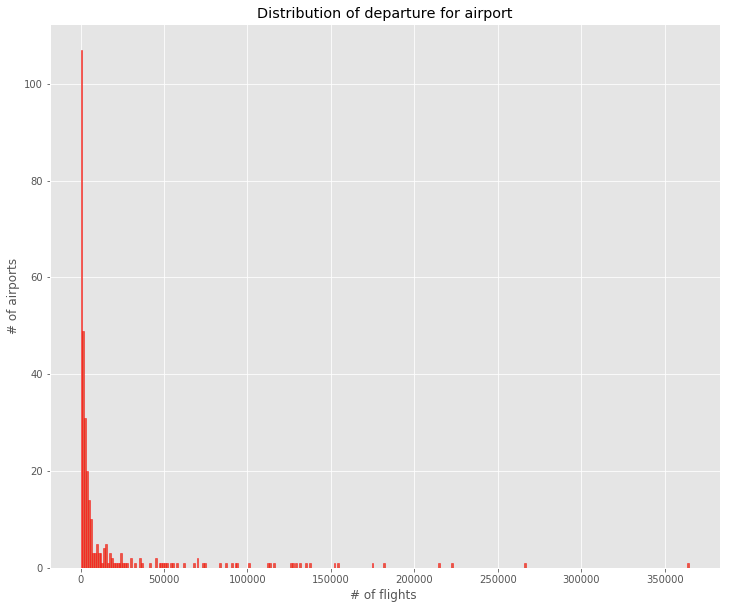

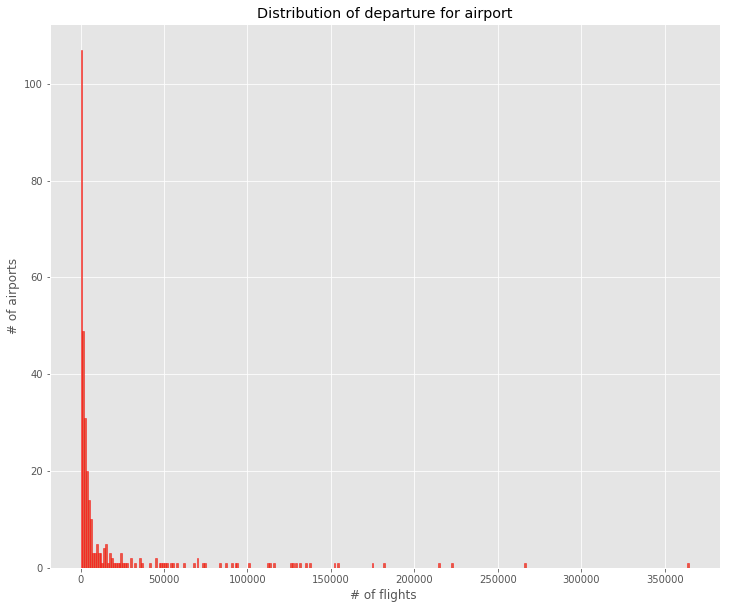

In [89]:
# Plotting
plt.figure(figsize=(12, 10))
plt.hist(flights_in_each_airport, bins = len(flights_in_each_airport),
         edgecolor='red',alpha = 0.9)
plt.xlabel('# of flights ')
plt.ylabel('# of airports')
plt.title('Distribution of departure for airport')
plt.show()

## Question 4

* Create a plot that shows the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.

In [90]:
# Select all flights delayed
df_delay = data[["Fl_Date","Dep_Delay"]].loc[data.Dep_Delay > 0]
df_delay.head(10)

,Fl_Date,Dep_Delay
4,2017-01-01,16.0
5,2017-01-01,1.0
6,2017-01-01,22.0
8,2017-01-01,6.0
9,2017-01-01,55.0
10,2017-01-01,24.0
11,2017-01-01,6.0
12,2017-01-01,17.0
16,2017-01-01,1.0
18,2017-01-01,52.0


,Fl_Date,Dep_Delay
4,2017-01-01,16.0
5,2017-01-01,1.0
6,2017-01-01,22.0
8,2017-01-01,6.0
9,2017-01-01,55.0
10,2017-01-01,24.0
11,2017-01-01,6.0
12,2017-01-01,17.0
16,2017-01-01,1.0
18,2017-01-01,52.0


In [91]:
# Group all flights delayed per month 
months = df_delay.groupby(df_delay.Fl_Date.dt.month) #  datetime.date objects 
print("Grouped our data in months?",len(months)==12)

Grouped our data in months? True
Grouped our data in months? True


In [92]:
# Show #of flight delayed for each months
x1 = months.size()
x1

Fl_Date
1     168917
2     123829
3     167616
4     163361
5     177199
6     197546
7     197083
8     188467
9     124555
10    145783
11    125138
12    168404
dtype: int64

Fl_Date
1     168917
2     123829
3     167616
4     163361
5     177199
6     197546
7     197083
8     188467
9     124555
10    145783
11    125138
12    168404
dtype: int64

In [93]:
# Group all flights per month
df_months = data.groupby(data.Fl_Date.dt.month)
print("Grouped our data in months?",len(df_months)==12)

Grouped our data in months? True
Grouped our data in months? True


In [94]:
# Show #of flight delayed for each months
x2 = df_months.size()
x2

Fl_Date
1     450017
2     410517
3     488597
4     468329
5     486483
6     494266
7     509070
8     510451
9     458727
10    479797
11    454162
12    464205
dtype: int64

Fl_Date
1     450017
2     410517
3     488597
4     468329
5     486483
6     494266
7     509070
8     510451
9     458727
10    479797
11    454162
12    464205
dtype: int64

 Best way to visualize this information is creating a Double Bar Plot

In [95]:
# Create an DateTime index for plotting 
times = pd.date_range('2017-01-01', periods=12, freq='MS')
display(times)
display(type(times))

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

In [96]:
# Create a dataframe that will be plotted
yesSeries = pd.Series(x1.values, index=times)
nodSeries = pd.Series(x2.values, index=times)

df = pd.DataFrame({"Delay Flights":yesSeries,"Total Flights":nodSeries})
df


,Delay Flights,Total Flights
2017-01-01,168917,450017
2017-02-01,123829,410517
2017-03-01,167616,488597
2017-04-01,163361,468329
2017-05-01,177199,486483
2017-06-01,197546,494266
2017-07-01,197083,509070
2017-08-01,188467,510451
2017-09-01,124555,458727
2017-10-01,145783,479797


,Delay Flights,Total Flights
2017-01-01,168917,450017
2017-02-01,123829,410517
2017-03-01,167616,488597
2017-04-01,163361,468329
2017-05-01,177199,486483
2017-06-01,197546,494266
2017-07-01,197083,509070
2017-08-01,188467,510451
2017-09-01,124555,458727
2017-10-01,145783,479797


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

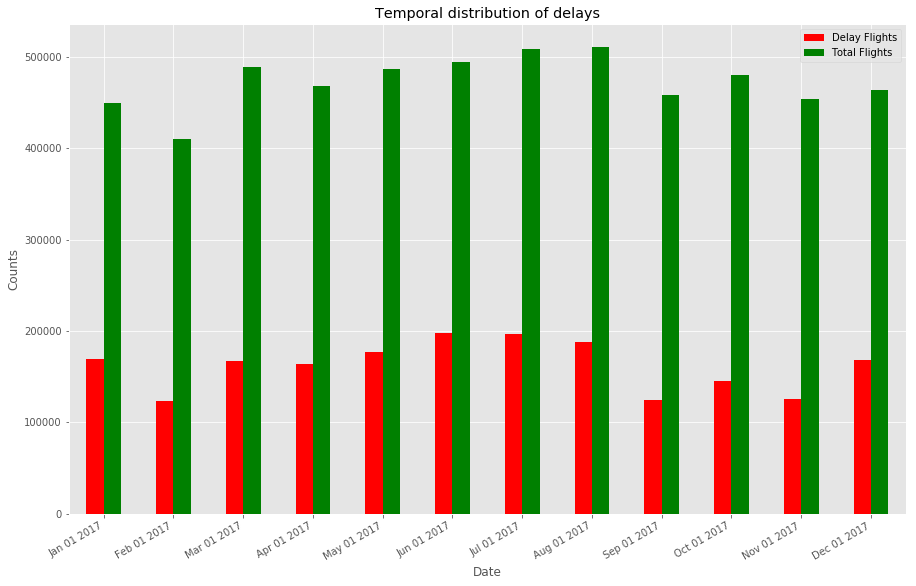

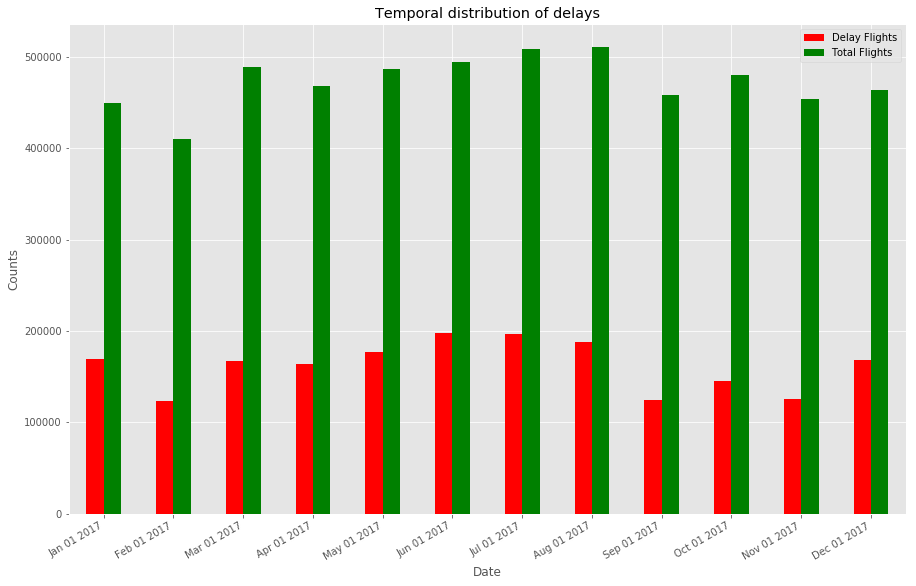

In [97]:
# Plotting 
plt.figure(figsize=(12, 10))

ax = df.plot.bar(color = ["Red","Green"], rot=0,
                 align = "center",
                 title = "Temporal distribution of delays",
                 figsize = (15,10))

ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.gcf().autofmt_xdate()
plt.show()

## Question 5

* Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.

 Most pythonic way to solve this problem is to use pivot tables:

In [98]:
# Create a pivot table
pv = pd.pivot_table(data, values='Dep_Delay', index=['Origin',"Dest"],
                    columns = ["Carrier"], aggfunc= np.mean)
pv

Carrier             AA        AS         B6         DL          EV         F9  \
Origin Dest                                                                     
ABE    ATL         NaN       NaN        NaN   4.723164   15.730983        NaN   
       DTW         NaN       NaN        NaN        NaN  100.629630        NaN   
       ORD         NaN       NaN        NaN        NaN    9.872928        NaN   
ABI    DFW         NaN       NaN        NaN        NaN   19.875000        NaN   
       GRK         NaN       NaN        NaN        NaN   75.000000        NaN   
ABQ    ATL         NaN       NaN        NaN   6.023256         NaN        NaN   
       AUS         NaN       NaN        NaN        NaN         NaN        NaN   
       BWI         NaN       NaN        NaN        NaN         NaN        NaN   
       DAL         NaN       NaN        NaN        NaN         NaN        NaN   
       DEN         NaN       NaN        NaN        NaN         NaN   8.878049   
       DFW    5.729875       NaN        NaN        NaN         NaN        NaN   
       HOU         NaN       NaN        NaN        NaN         NaN        NaN   
       IAH         NaN       NaN        NaN        NaN    3.718750        NaN   
       JFK         NaN       NaN  15.423453        NaN         NaN        NaN   
       LAS         NaN       NaN        NaN        NaN         NaN        NaN   
       LAX         NaN       NaN        NaN        NaN         NaN        NaN   
       MCI         NaN       NaN        NaN        NaN         NaN        NaN   
       MCO         NaN       NaN        NaN        NaN         NaN        NaN   
       MDW         NaN       NaN        NaN        NaN         NaN        NaN   
       MSP         NaN       NaN        NaN   2.336493         NaN        NaN   
       OAK         NaN       NaN        NaN        NaN         NaN        NaN   
       ORD   -4.008000       NaN        NaN        NaN         NaN        NaN   
       PDX         NaN       NaN        NaN        NaN         NaN        NaN   
       PHX    6.111111       NaN        NaN        NaN         NaN        NaN   
       SAN         NaN       NaN        NaN        NaN         NaN        NaN   
       SEA         NaN  1.258242        NaN        NaN         NaN        NaN   
       SFO         NaN       NaN        NaN        NaN         NaN        NaN   
       SLC         NaN       NaN        NaN   7.855030         NaN        NaN   
ABR    MSP         NaN       NaN        NaN        NaN         NaN        NaN   
ABY    ATL         NaN       NaN        NaN        NaN   13.233677        NaN   
...                ...       ...        ...        ...         ...        ...   
TYS    DEN         NaN       NaN        NaN        NaN         NaN  13.824742   
       DFW         NaN       NaN        NaN        NaN   17.589537        NaN   
       DTW         NaN       NaN        NaN  17.500000   -6.500000        NaN   
       EWR         NaN       NaN        NaN        NaN    0.419048        NaN   
       IAH         NaN       NaN        NaN        NaN    1.826667        NaN   
       LGA         NaN       NaN        NaN  -1.000000   74.080357        NaN   
       MCO         NaN       NaN        NaN        NaN         NaN   9.447368   
       ORD         NaN       NaN        NaN        NaN    4.605505        NaN   
UIN    CGI         NaN       NaN        NaN        NaN         NaN        NaN   
       ORD         NaN       NaN        NaN        NaN         NaN        NaN   
UST    PHL         NaN       NaN        NaN        NaN         NaN  59.369231   
VLD    ATL         NaN       NaN        NaN        NaN    9.488408        NaN   
VPS    ATL         NaN       NaN        NaN   6.168166   16.642032        NaN   
       DFW    3.151163       NaN        NaN        NaN   11.846774        NaN   
       IAH         NaN       NaN        NaN        NaN    6.454203        NaN   
WRG    KTN         NaN -6.747191        NaN        NaN         NaN        NaN   
       PSG         NaN  1.76536

Carrier             AA        AS         B6         DL          EV         F9  \
Origin Dest                                                                     
ABE    ATL         NaN       NaN        NaN   4.723164   15.730983        NaN   
       DTW         NaN       NaN        NaN        NaN  100.629630        NaN   
       ORD         NaN       NaN        NaN        NaN    9.872928        NaN   
ABI    DFW         NaN       NaN        NaN        NaN   19.875000        NaN   
       GRK         NaN       NaN        NaN        NaN   75.000000        NaN   
ABQ    ATL         NaN       NaN        NaN   6.023256         NaN        NaN   
       AUS         NaN       NaN        NaN        NaN         NaN        NaN   
       BWI         NaN       NaN        NaN        NaN         NaN        NaN   
       DAL         NaN       NaN        NaN        NaN         NaN        NaN   
       DEN         NaN       NaN        NaN        NaN         NaN   8.878049   
       DFW    5.729875       NaN        NaN        NaN         NaN        NaN   
       HOU         NaN       NaN        NaN        NaN         NaN        NaN   
       IAH         NaN       NaN        NaN        NaN    3.718750        NaN   
       JFK         NaN       NaN  15.423453        NaN         NaN        NaN   
       LAS         NaN       NaN        NaN        NaN         NaN        NaN   
       LAX         NaN       NaN        NaN        NaN         NaN        NaN   
       MCI         NaN       NaN        NaN        NaN         NaN        NaN   
       MCO         NaN       NaN        NaN        NaN         NaN        NaN   
       MDW         NaN       NaN        NaN        NaN         NaN        NaN   
       MSP         NaN       NaN        NaN   2.336493         NaN        NaN   
       OAK         NaN       NaN        NaN        NaN         NaN        NaN   
       ORD   -4.008000       NaN        NaN        NaN         NaN        NaN   
       PDX         NaN       NaN        NaN        NaN         NaN        NaN   
       PHX    6.111111       NaN        NaN        NaN         NaN        NaN   
       SAN         NaN       NaN        NaN        NaN         NaN        NaN   
       SEA         NaN  1.258242        NaN        NaN         NaN        NaN   
       SFO         NaN       NaN        NaN        NaN         NaN        NaN   
       SLC         NaN       NaN        NaN   7.855030         NaN        NaN   
ABR    MSP         NaN       NaN        NaN        NaN         NaN        NaN   
ABY    ATL         NaN       NaN        NaN        NaN   13.233677        NaN   
...                ...       ...        ...        ...         ...        ...   
TYS    DEN         NaN       NaN        NaN        NaN         NaN  13.824742   
       DFW         NaN       NaN        NaN        NaN   17.589537        NaN   
       DTW         NaN       NaN        NaN  17.500000   -6.500000        NaN   
       EWR         NaN       NaN        NaN        NaN    0.419048        NaN   
       IAH         NaN       NaN        NaN        NaN    1.826667        NaN   
       LGA         NaN       NaN        NaN  -1.000000   74.080357        NaN   
       MCO         NaN       NaN        NaN        NaN         NaN   9.447368   
       ORD         NaN       NaN        NaN        NaN    4.605505        NaN   
UIN    CGI         NaN       NaN        NaN        NaN         NaN        NaN   
       ORD         NaN       NaN        NaN        NaN         NaN        NaN   
UST    PHL         NaN       NaN        NaN        NaN         NaN  59.369231   
VLD    ATL         NaN       NaN        NaN        NaN    9.488408        NaN   
VPS    ATL         NaN       NaN        NaN   6.168166   16.642032        NaN   
       DFW    3.151163       NaN        NaN        NaN   11.846774        NaN   
       IAH         NaN       NaN        NaN        NaN    6.454203        NaN   
WRG    KTN         NaN -6.747191        NaN        NaN         NaN        NaN   
       PSG         NaN  1.76536

In [99]:
# Here we filtered the pivot table:
# every row correspond to unique trip and we have the mean delay 
# that each company totalized for this unique trip
take_min_each_row = pv.min(axis=1)
select_best_carrier = pv.idxmin(axis=1)
combined = pd.concat([take_min_each_row, select_best_carrier], axis=1)
combined

0   1
Origin Dest               
ABE    ATL    4.723164  DL
       DTW    9.452926  OO
       ORD    9.872928  EV
ABI    DFW   19.875000  EV
       GRK   75.000000  EV
ABQ    ATL    6.023256  DL
       AUS    5.441860  WN
       BWI    9.421642  WN
       DAL    9.748954  WN
       DEN    1.098940  OO
       DFW    5.729875  AA
       HOU    7.969488  WN
       IAH    2.203540  UA
       JFK   15.423453  B6
       LAS    8.945604  WN
       LAX    6.382637  OO
       MCI   11.908046  WN
       MCO    3.987179  WN
       MDW    6.715976  WN
       MSP    2.336493  DL
       OAK    7.839384  WN
       ORD   -4.008000  AA
       PDX   14.109091  WN
       PHX    1.140306  OO
       SAN    8.706970  WN
       SEA    1.258242  AS
       SFO    5.506122  OO
       SLC    3.245211  OO
ABR    MSP    9.381944  OO
ABY    ATL   13.233677  EV
...                ...  ..
TYS    DEN   13.115385  OO
       DFW   13.280000  OO
       DTW   -6.500000  EV
       EWR    0.419048  EV
       IAH    1.826667  EV
       LGA   -1.000000  DL
       MCO    9.447368  F9
       ORD    4.605505  EV
UIN    CGI   12.153846  OO
       ORD   16.041667  OO
UST    PHL   59.369231  F9
VLD    ATL    9.488408  EV
VPS    ATL    6.168166  DL
       DFW    3.151163  AA
       IAH   -6.666667  OO
WRG    KTN   -6.747191  AS
       PSG    1.765363  AS
WYS    SLC   12.716157  OO
XNA    ATL    4.647359  DL
       CVG   -2.000000  DL
       DEN    6.883041  OO
       DFW   42.066667  AA
       IAH   -5.705882  OO
       LGA   51.803213  EV
       MSP   -5.500000  DL
       ORD    8.280277  OO
       SFO    5.268012  OO
YAK    CDV   -5.033994  AS
       JNU   -8.870056  AS
YUM    PHX    3.411337  OO

[4776 rows x 2 columns]

0   1
Origin Dest               
ABE    ATL    4.723164  DL
       DTW    9.452926  OO
       ORD    9.872928  EV
ABI    DFW   19.875000  EV
       GRK   75.000000  EV
ABQ    ATL    6.023256  DL
       AUS    5.441860  WN
       BWI    9.421642  WN
       DAL    9.748954  WN
       DEN    1.098940  OO
       DFW    5.729875  AA
       HOU    7.969488  WN
       IAH    2.203540  UA
       JFK   15.423453  B6
       LAS    8.945604  WN
       LAX    6.382637  OO
       MCI   11.908046  WN
       MCO    3.987179  WN
       MDW    6.715976  WN
       MSP    2.336493  DL
       OAK    7.839384  WN
       ORD   -4.008000  AA
       PDX   14.109091  WN
       PHX    1.140306  OO
       SAN    8.706970  WN
       SEA    1.258242  AS
       SFO    5.506122  OO
       SLC    3.245211  OO
ABR    MSP    9.381944  OO
ABY    ATL   13.233677  EV
...                ...  ..
TYS    DEN   13.115385  OO
       DFW   13.280000  OO
       DTW   -6.500000  EV
       EWR    0.419048  EV
       IAH    1.826667  EV
       LGA   -1.000000  DL
       MCO    9.447368  F9
       ORD    4.605505  EV
UIN    CGI   12.153846  OO
       ORD   16.041667  OO
UST    PHL   59.369231  F9
VLD    ATL    9.488408  EV
VPS    ATL    6.168166  DL
       DFW    3.151163  AA
       IAH   -6.666667  OO
WRG    KTN   -6.747191  AS
       PSG    1.765363  AS
WYS    SLC   12.716157  OO
XNA    ATL    4.647359  DL
       CVG   -2.000000  DL
       DEN    6.883041  OO
       DFW   42.066667  AA
       IAH   -5.705882  OO
       LGA   51.803213  EV
       MSP   -5.500000  DL
       ORD    8.280277  OO
       SFO    5.268012  OO
YAK    CDV   -5.033994  AS
       JNU   -8.870056  AS
YUM    PHX    3.411337  OO

[4776 rows x 2 columns]